In [42]:
import os
import sys
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
sys.path.insert(0, "./")

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import src
import src.preproc_utils as prep

In [3]:
## it is better to generate masked frames directly, without saving. Otherwise, problems appear
# if saved as video: frames are distorted by mp4 conversion
# if saved as arrays: too heavy files

video_path = os.path.join(src.DATAPATH, "processed/cut_aligned_gray.MP4")
frames_gray = prep.rgb2gray(src.video_utils.get_frames(video_path))

mask = np.load("./data/processed/mask.npy")

frames = prep.mask_frames(mask, frames_gray)

print(mask.shape, frames.shape)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<00:00, 323.48it/s]

(1760, 1760) (118, 1760, 1760)


_________

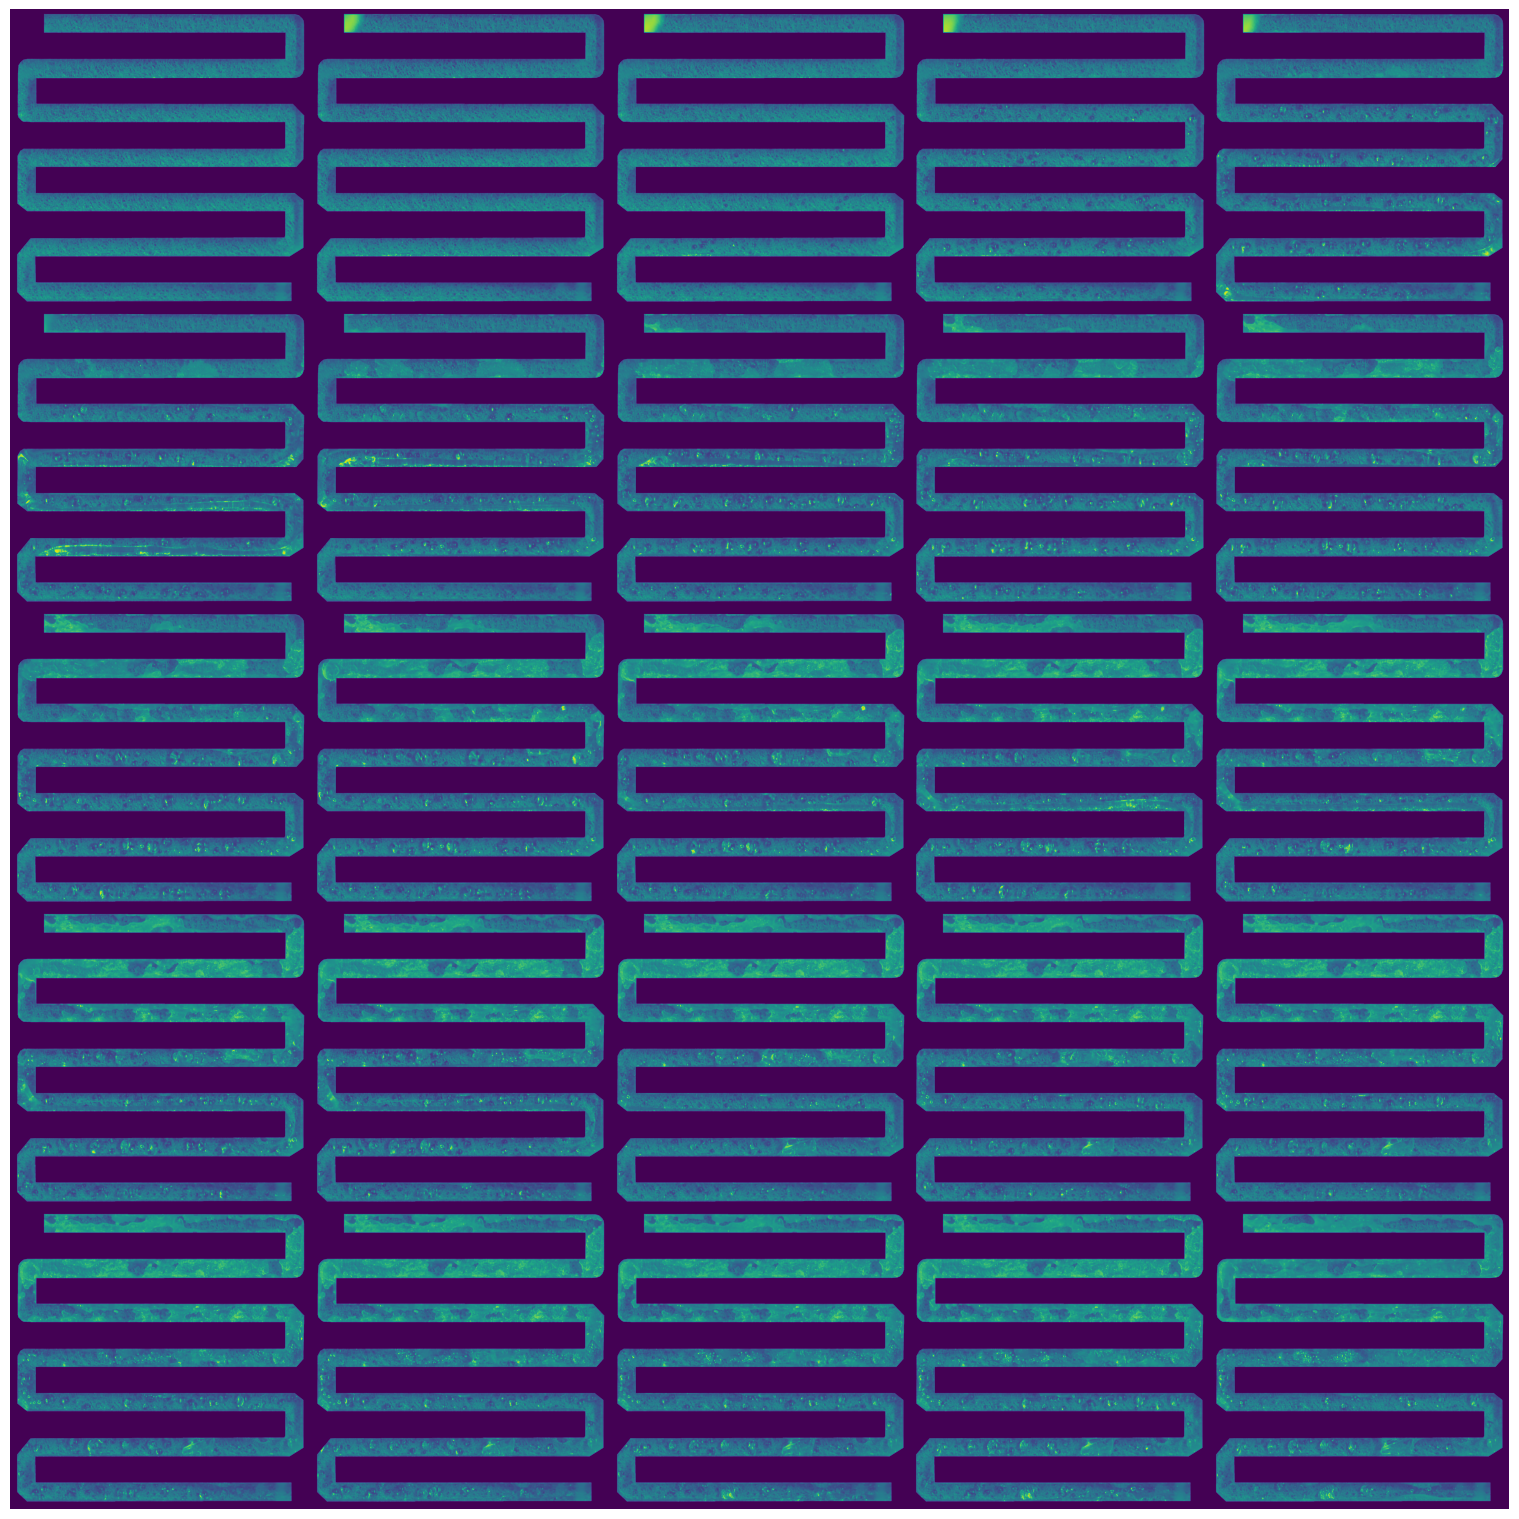

In [4]:
src.vis_utils.vis_grid(frames, r=5,c=5);

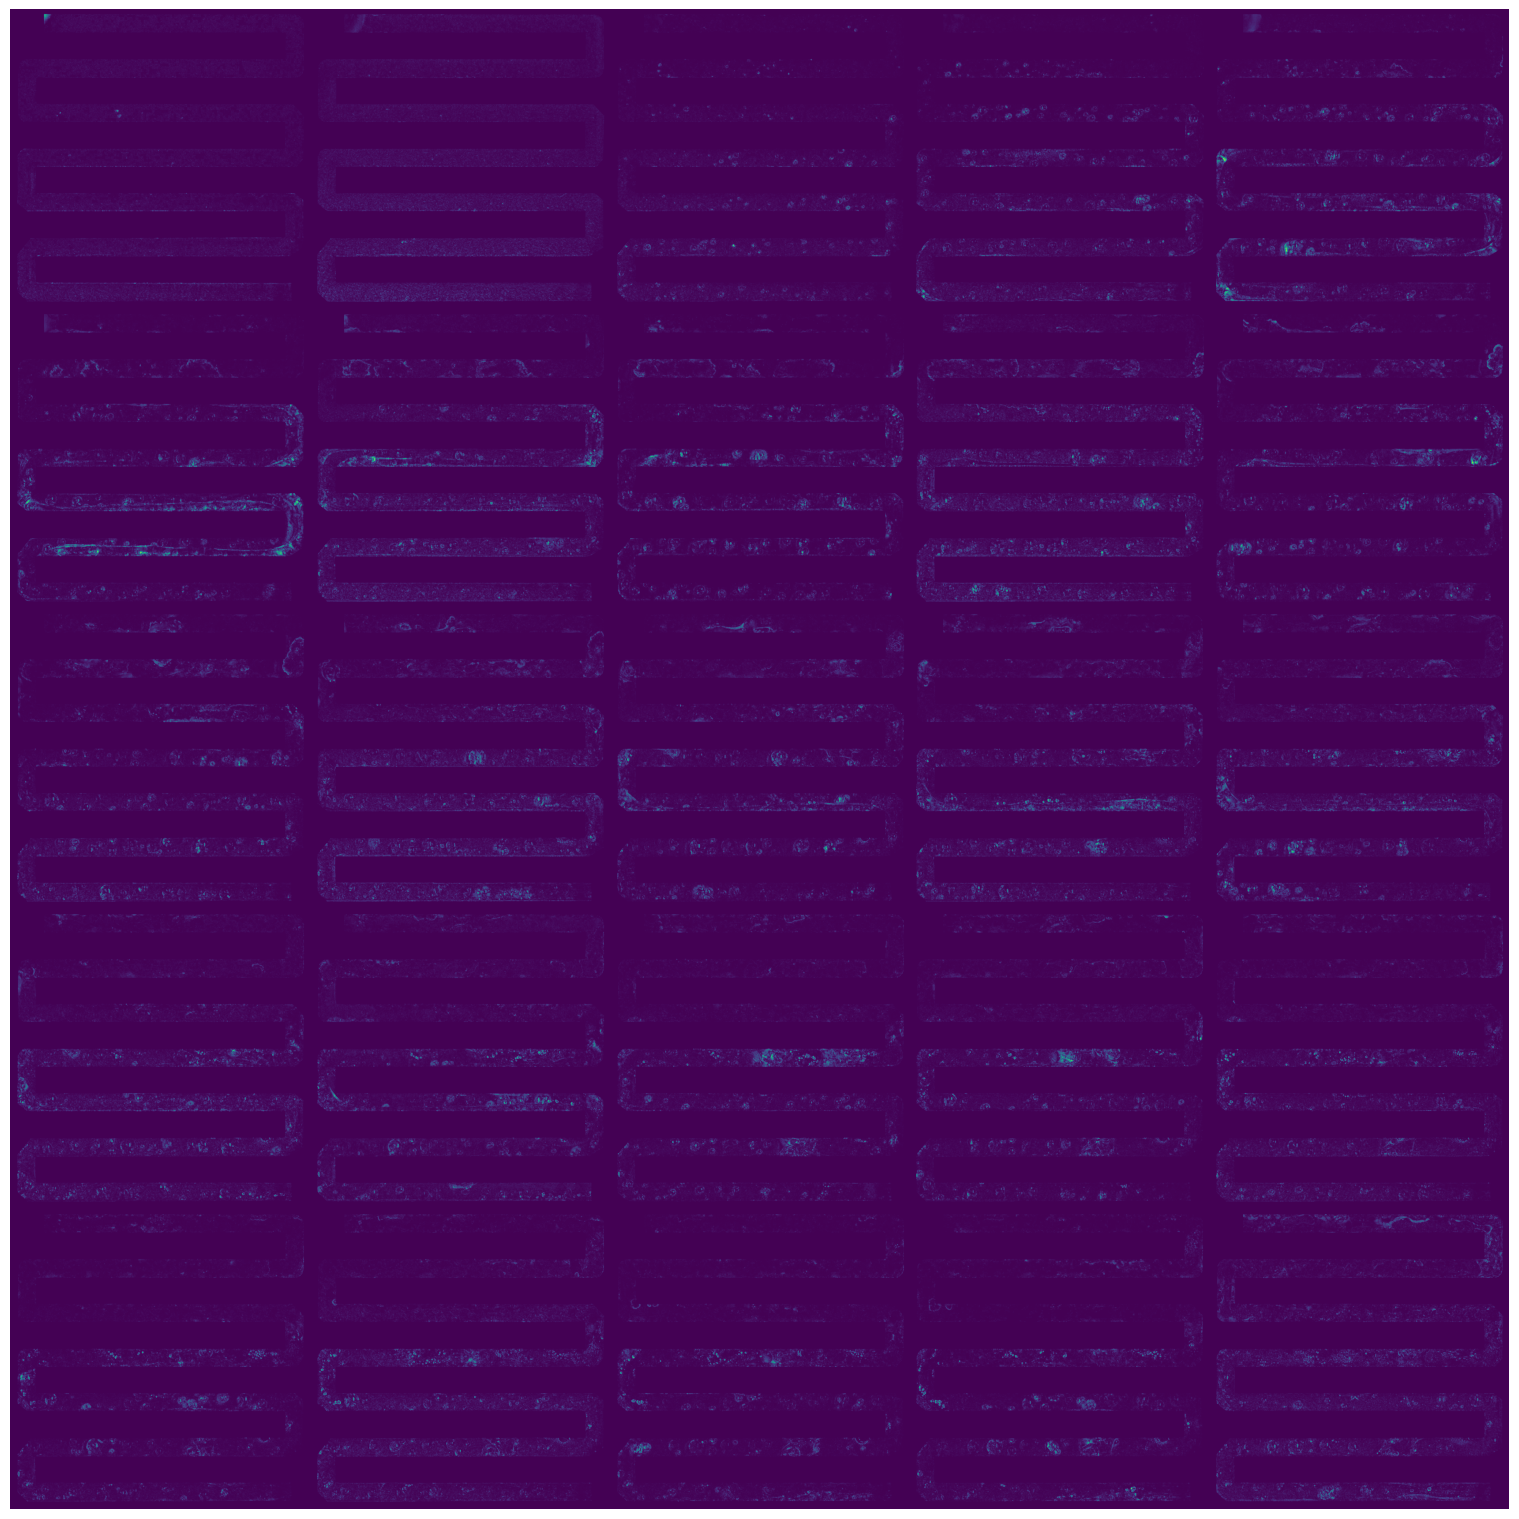

In [24]:
diffs = np.abs(frames[:-1] - frames[1:])
src.vis_utils.vis_grid(diffs, r=5,c=5);

_______

In [59]:
# threshold (removes background signal)

thresh_path = os.path.join(src.DATAPATH, "processed/thresholded/")
os.makedirs(thresh_path, exist_ok=True)

for mult in [1,2,4,5,6,7,3]:
    print(mult)
    diffs_cleaned = []
    for i in tqdm(range(len(diffs))):
        f = diffs[i].copy()
        T = np.mean(f[mask > 0]) * mult
        f[(f < T) * (mask > 0)] = 0.
        diffs_cleaned.append(f)

    diffs_cleaned = np.stack(diffs_cleaned)
    diffs_cleaned = np.concatenate([diffs_cleaned[...,None]] * 3, axis=-1)
    
    vid_path = os.path.join(thresh_path, f"Tmult_{mult}.mp4")
    src.utils.write_frames(diffs_cleaned, vid_path)


1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 131.78it/s]


2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:01<00:00, 114.63it/s]


4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:01<00:00, 112.20it/s]


5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:01<00:00, 103.43it/s]


6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:01<00:00, 114.67it/s]


7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:01<00:00, 114.08it/s]


3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 124.59it/s]


In [62]:
# stack diff. thresholdings side by side
src.video_utils.stack_videos(
    sorted(glob(thresh_path+"*.mp4")), 
    os.path.join(thresh_path, f"T_stack.mp4"), axis=1)

# make video frame ~twice smaller
src.video_utils.resize_video(
    os.path.join(thresh_path, f"T_stack.mp4"), 
    os.path.join(thresh_path, f"T_stack.mp4"), 
    h=800)


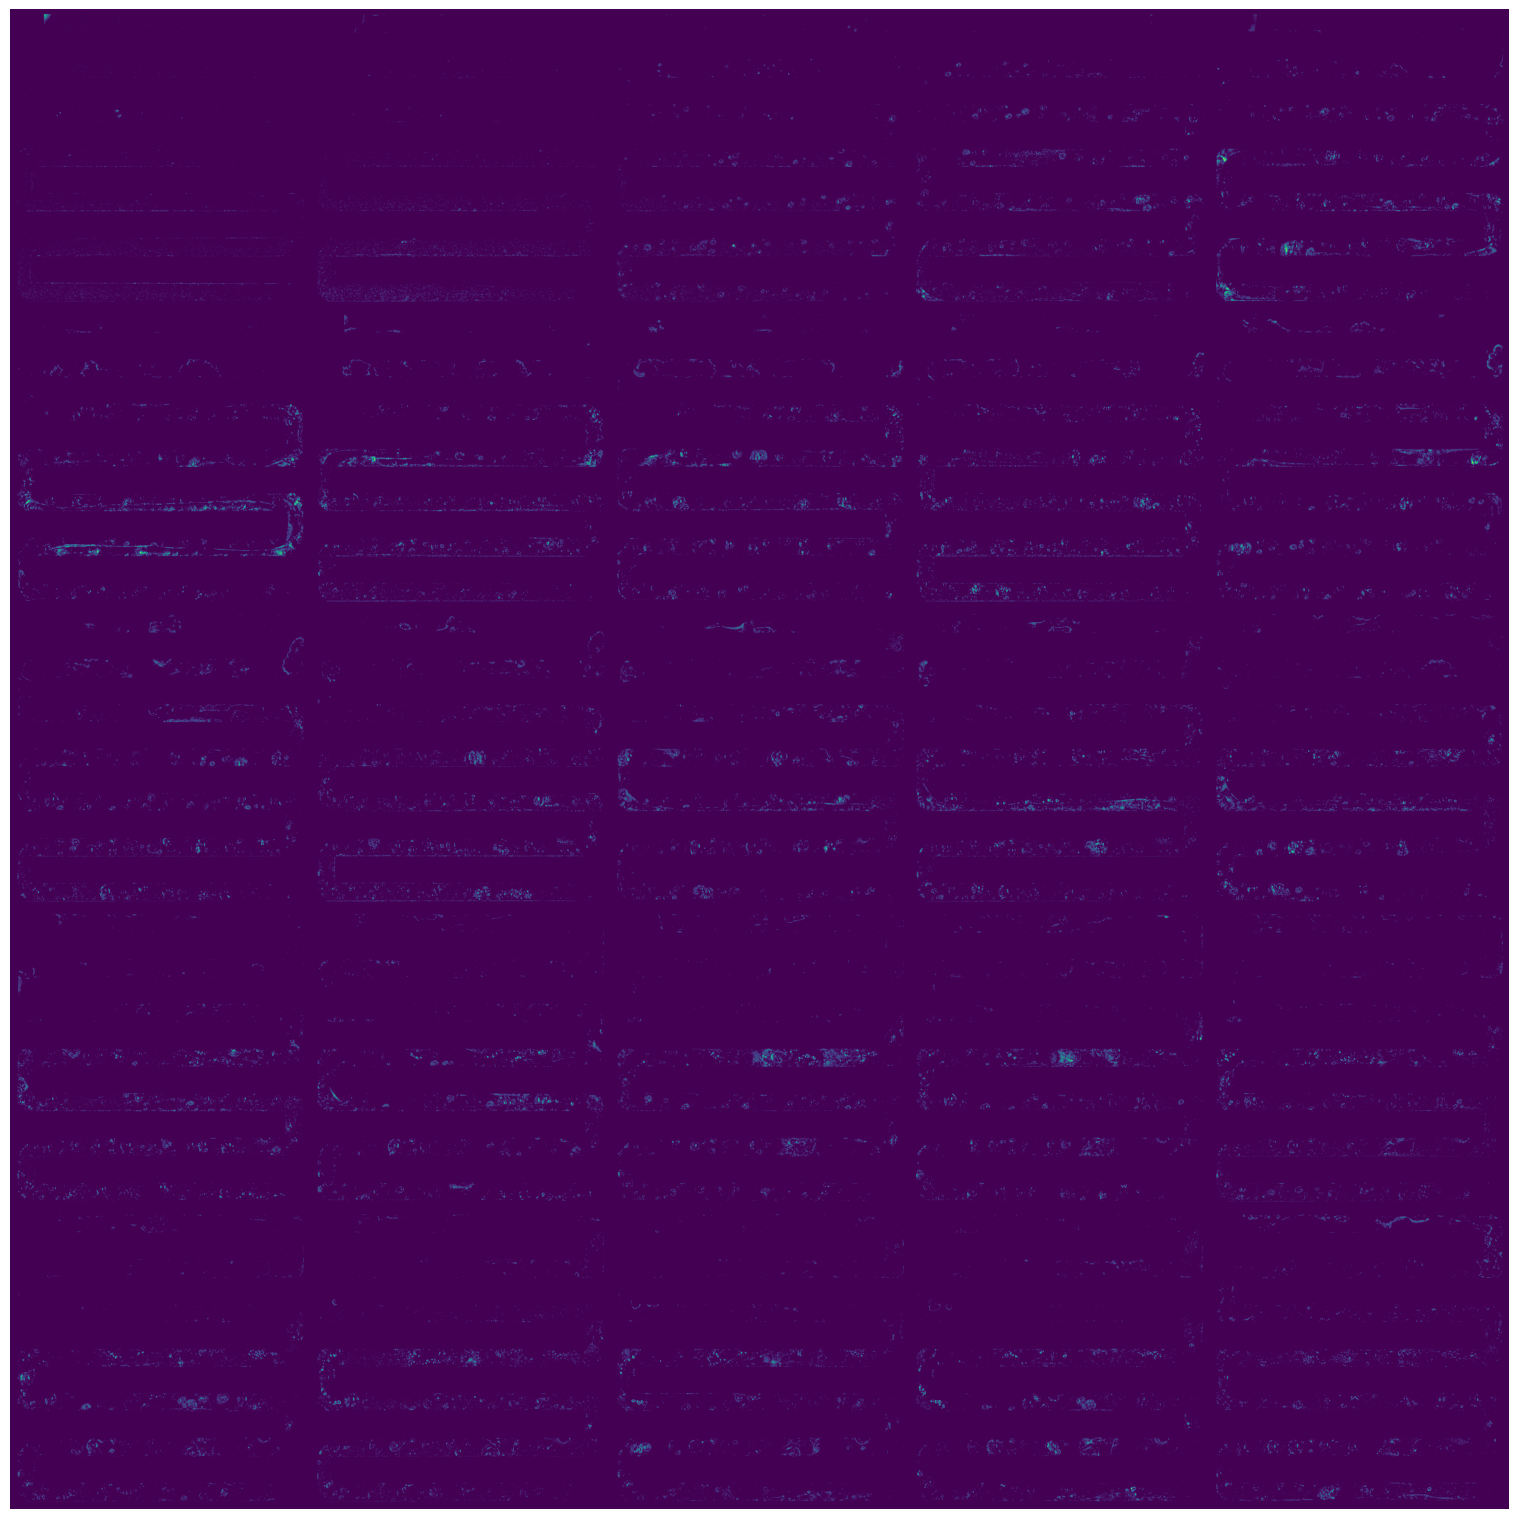

In [65]:
# result of thresholding (T = mean * 3)
src.vis_utils.vis_grid(diffs_cleaned[...,0], r=5,c=5);